# Selfish Trajectory Optimization

In [99]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import os
import sys
import numpy as np
from warnings import warn
sys.path.append(os.path.abspath('..'))
from cav_game.dynamics.car import BicycleDynamics
from cav_game.maneuvers.selfish import SelfishManeuver

### 1. Define Parameters

In [101]:

# Vehicle i initial conditions
x0 = 0       # Vehicle i initial x position [m]
v0 = 17      # Vehicle i initial velocity [m/s]
X0 = np.array([x0, v0])
# Obstacle i initial conditions
x0_obst = 20 # Obstacle i initial x position [m]
v0_obst = 16  # Obstacle i initial velocity [m/s]
X0_obst = np.array([x0_obst, v0_obst])
# Obstacle location descriptor
obstacles = {"front": X0_obst}
# Construct optimization parameters
maneuver_params = {"cav_type":"CAVC",
                   "n":300,
                   "diff_method":'dae.finite_difference',
                   "alpha_control":0.1,
                   "alpha_time":0.1,
                   "alpha_speed":0.9}
# Construct vehicle model
veh_params = {}
cav_model = BicycleDynamics(veh_params)
# Construct maneuver
long_maneuver = SelfishManeuver(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)


### 3. Compute CAVC Trajectory

Optimal solution found


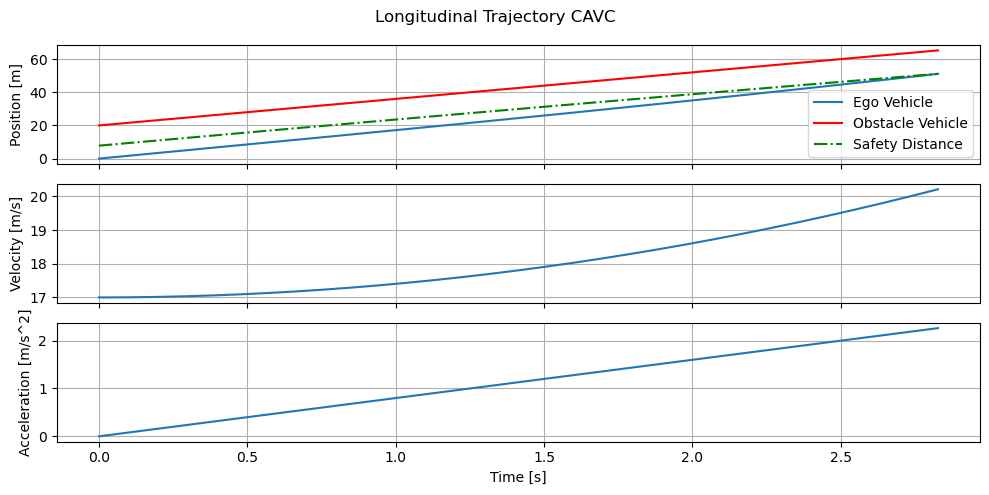

In [102]:
feasible, traj = long_maneuver.compute_longitudinal_trajectory(obstacle=True)

if not feasible:
    warn("Trajectory is infeasible")

### 4. Relax Terminal Time and compute new trajectory

Optimal solution found


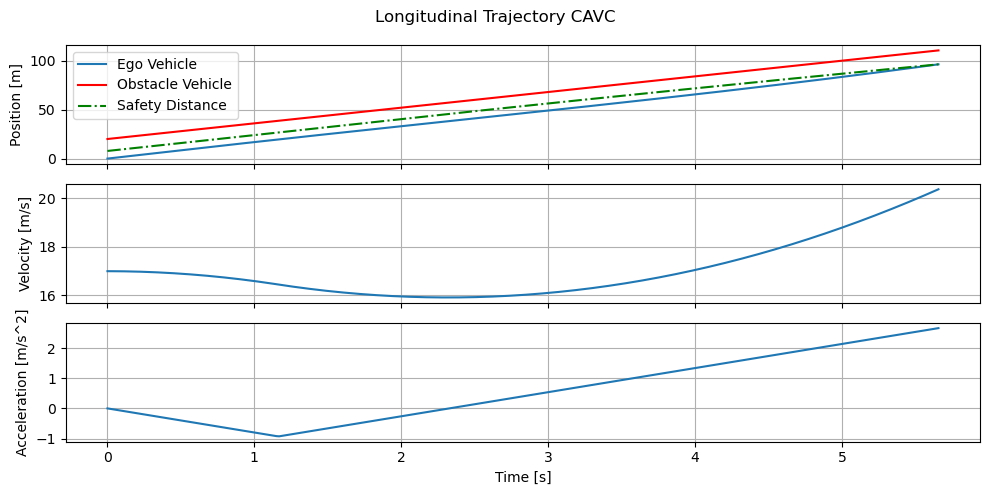

In [103]:
# Extract previous terminal time
tf = traj['t'][-1]
feasible, traj = long_maneuver.relax_terminal_time(time=tf*2,obstacle=True)

if not feasible:
    warn("Trajectory is infeasible")